In [2]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
%matplotlib inline

In [153]:
n_features = 13
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
#     mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_features).T
    melspec = librosa.feature.melspectrogram(y=X, sr=sample_rate).T
    result = melspec#/np.max(melspec)
    return result

In [5]:
wav_file = './training-data/train_000002.wav'
smallest_wav_file = './training-data/train_004947.wav'
y, sr = librosa.load(smallest_wav_file)
librosa.get_duration(y=y, sr=sr)
librosa.feature.melspectrogram(y, sr=sr).T.shape

(10, 128)

In [6]:
def get_file_duration(file_name):
    y, sr = librosa.load(file_name)
    return librosa.get_duration(y=y, sr=sr)

In [9]:
training_folder = './training-data/'

files = list(glob.glob('{}/*.wav'.format(training_folder)))
file_durations = []

count = 0
for fn in files:
    count += 1
    file_durations.append(get_file_duration(fn))
    if count % 1000 == 0:
        print(count)
print(len(file_durations))

8523


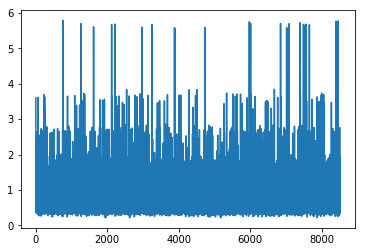

In [10]:
plt.plot(file_durations)

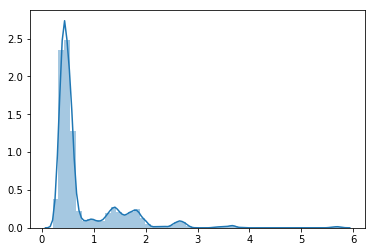

In [12]:
import seaborn as sns
sns.distplot(file_durations)

In [13]:
import sklearn
import scipy

In [14]:
print(np.amin(file_durations))
print(np.amax(file_durations))

0.20970521542
5.79337868481


In [16]:
test_folder = './test-data/'

test_files = list(glob.glob('{}/*.wav'.format(test_folder)))
test_file_durations = []
count = 0
for fn in test_files:
    count += 1
    test_file_durations.append(get_file_duration(fn))
    if count % 1000 == 0:
        print(count)
print(len(test_file_durations))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5137


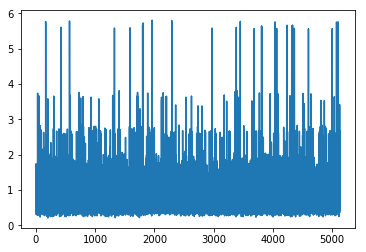

In [17]:
plt.plot(test_file_durations)

In [18]:
def parse_audio_file(filename, label):
    features = extract_feature(filename)
    labels = np.full((np.size(features, 0)), label)
    return features, labels

In [20]:
extract_feature('./training-data/train_004790.wav').shape

(11, 128)

In [22]:
feature = extract_feature('./training-data/train_004790.wav')
min_height = 10
height = feature.shape[0]
for i in range(0, height - min_height+1):
    print(feature[i:i+min_height, :].shape)

(10, 128)
(10, 128)


In [24]:
import csv
def get_labels(file_name):
    labels = {}
    with open(file_name, 'r') as label_file:
        label_reader = csv.reader(label_file)
        next(label_reader, None)
        for row in label_reader:
            file_name, label = row
            labels[file_name] = int(label)
    return labels
    
train_labels = get_labels('./training-data/train_labels.csv')

In [25]:
train_labels

{'train_000001.wav': 1,
 'train_000002.wav': 1,
 'train_000003.wav': 1,
 'train_000004.wav': 1,
 'train_000005.wav': 1,
 'train_000006.wav': 1,
 'train_000007.wav': 1,
 'train_000008.wav': 1,
 'train_000009.wav': 1,
 'train_000010.wav': 1,
 'train_000011.wav': 1,
 'train_000012.wav': 1,
 'train_000013.wav': 1,
 'train_000014.wav': 1,
 'train_000015.wav': 1,
 'train_000016.wav': 1,
 'train_000017.wav': 1,
 'train_000018.wav': 1,
 'train_000019.wav': 1,
 'train_000020.wav': 1,
 'train_000021.wav': 1,
 'train_000022.wav': 1,
 'train_000023.wav': 1,
 'train_000024.wav': 1,
 'train_000025.wav': 1,
 'train_000026.wav': 1,
 'train_000027.wav': 1,
 'train_000028.wav': 1,
 'train_000029.wav': 1,
 'train_000030.wav': 1,
 'train_000031.wav': 1,
 'train_000032.wav': 1,
 'train_000033.wav': 1,
 'train_000034.wav': 1,
 'train_000035.wav': 1,
 'train_000036.wav': 1,
 'train_000037.wav': 1,
 'train_000038.wav': 1,
 'train_000039.wav': 1,
 'train_000040.wav': 1,
 'train_000041.wav': 1,
 'train_000042.w

In [28]:
parent_dir = './'
tr_sub_dirs = ["training-data"]
ts_sub_dirs = ["test-data"]

In [154]:
all_features = []
all_labels = []
def parse_audio_files(parent_dir,sub_dirs, file_ext="*.wav"):
    for _, sub_dir in enumerate(sub_dirs):
        print("processing in subdir {}".format(sub_dir))
        file_count = 0
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            file_count += 1
            if file_count % 1000 ==0:
                print("file counts {}...".format(file_count))
            (_, filename) = os.path.split(fn)
            label = train_labels.get(filename, 0)
            features = extract_feature(fn)
            height = features.shape[0]
            for i in range(0, height - min_height + 1):
                ext_features = features[i:i+min_height, :]
                all_features.append(ext_features)
#                 all_labels.append(np.full((np.size(ext_features, 0)), label))
                all_labels.append(label)
parse_audio_files(parent_dir, tr_sub_dirs)
print("done processing files")

processing in subdir training-data
file counts 1000...
file counts 2000...
file counts 3000...
file counts 4000...
file counts 5000...
file counts 6000...
file counts 7000...
file counts 8000...
done processing files


In [124]:
all_features = np.asarray(all_features)
all_labels = np.asarray(all_labels)
all_labels = all_labels.reshape(-1, 1)
print(np.asarray(all_features).shape)
print(np.asarray(all_labels).shape)

(214681, 10, 128)
(214681, 1)


In [126]:
print(np.max(all_features))

1.0


In [31]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Activation, ZeroPadding2D, Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import backend as K
K.set_image_dim_ordering('tf')

num_epochs = 1

def training(X_train, y_train, X_test, y_test):
    inputs = Input(shape=all_features.shape, dtype='float32')
    act = 'relu'
    pool_size = 2
    n_batch_size = 50
    model = Sequential()
    model.add(Conv2D(64, (5, 5), padding='same', activation=act, input_shape=(10, 128, 1)))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Conv2D(64, (5, 5), padding='same', activation=act))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Flatten())
    model.add(Dense(1000, activation=act))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=n_batch_size, epochs=num_epochs)
    scores = model.evaluate(X_test, y_test, verbose=0)
    return scores[1]*100

Using TensorFlow backend.


In [33]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold

# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# cvscores = []

# for train, test in kfold.split(all_features, all_labels):
#     print(train, test)
#     break
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels)
X_train = np.expand_dims(X_train, axis=3)

In [34]:
X_train.shape

(161010, 10, 128, 1)

In [36]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Activation, ZeroPadding2D, Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import backend as K
K.set_image_dim_ordering('tf')

inputs = Input(shape=all_features.shape, dtype='float32')
act = 'relu'
pool_size = 2
n_batch_size = 500
model = Sequential()
model.add(Conv2D(64, (5, 5), padding='same', activation=act, input_shape=(10, 128, 1)))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Conv2D(64, (5, 5), padding='same', activation=act))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Flatten())
model.add(Dense(1000, activation=act))
# model.add(Dense(100, activation=act))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=n_batch_size, epochs=1)

Epoch 1/1
161010/161010 [==============================] - 294s - loss: 0.4536 - acc: 0.9600   


## check output

In [37]:
X_test = np.expand_dims(X_test, axis=3)
X_test.shape

(53671, 10, 128, 1)

In [38]:
scores = model.evaluate(X_test, y_test, verbose=1)

53600/53671 [============================>.] - ETA: 0s

In [39]:
print(scores)

[0.011467746698311668, 0.99616180059995152]


In [40]:
prediction = model.predict(X_test)

In [41]:
print(prediction)

[[  3.24093661e-28]
 [  5.14720601e-12]
 [  0.00000000e+00]
 ..., 
 [  0.00000000e+00]
 [  2.95745849e-06]
 [  3.57430616e-34]]


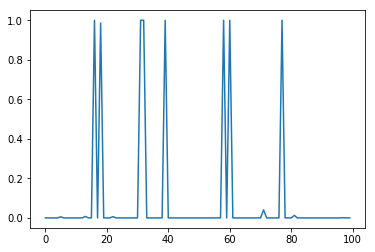

In [42]:
plt.figure()
plt.plot(prediction[:100])
plt.show()

In [46]:
a = prediction
a[a<0.5]= 0
a[a>0.5]= 1
a = a.astype("uint8")

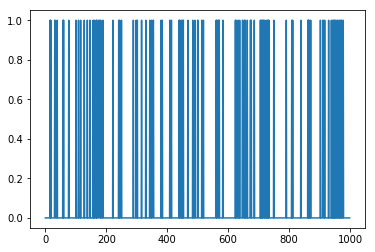

In [60]:
plt.figure()
plt.plot(a[:1000])
plt.show()

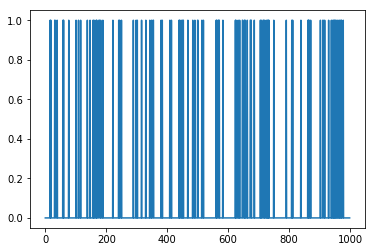

In [59]:
plt.figure()
plt.plot(y_test[:1000])
plt.show()

In [48]:
print(a)

[[0]
 [0]
 [0]
 ..., 
 [0]
 [0]
 [0]]


## output test

In [2]:
!ls discharge-detection/test-data/

ls: discharge-detection/test-data/: No such file or directory


In [55]:
import os
path = "test-data/"
test_list = os.listdir(path)
test_list.sort()
print(test_list)

['test_000001.wav', 'test_000002.wav', 'test_000003.wav', 'test_000004.wav', 'test_000005.wav', 'test_000006.wav', 'test_000007.wav', 'test_000008.wav', 'test_000009.wav', 'test_000010.wav', 'test_000011.wav', 'test_000012.wav', 'test_000013.wav', 'test_000014.wav', 'test_000015.wav', 'test_000016.wav', 'test_000017.wav', 'test_000018.wav', 'test_000019.wav', 'test_000020.wav', 'test_000021.wav', 'test_000022.wav', 'test_000023.wav', 'test_000024.wav', 'test_000025.wav', 'test_000026.wav', 'test_000027.wav', 'test_000028.wav', 'test_000029.wav', 'test_000030.wav', 'test_000031.wav', 'test_000032.wav', 'test_000033.wav', 'test_000034.wav', 'test_000035.wav', 'test_000036.wav', 'test_000037.wav', 'test_000038.wav', 'test_000039.wav', 'test_000040.wav', 'test_000041.wav', 'test_000042.wav', 'test_000043.wav', 'test_000044.wav', 'test_000045.wav', 'test_000046.wav', 'test_000047.wav', 'test_000048.wav', 'test_000049.wav', 'test_000050.wav', 'test_000051.wav', 'test_000052.wav', 'test_00005

In [67]:
## check on test data
min_height = 10
final_pred = []
for j in test_list:
    test_file = os.path.join(path, j)
    features = extract_feature(test_file)
    height = features.shape[0]
    label = 0 
    feat = []
    for i in range(0, height - min_height + 1):
        ext_features = features[i:i+min_height, :]
        feat.append(ext_features)

#         all_features.append(ext_features)
    feat = np.expand_dims(feat, axis=3)
    predict = model.predict(feat)
    if np.sum(predict) > 0.5:
        label = 1
    final_pred.append(label)
    print("processing - {} - {}".format(j, label))        

processing - test_000001.wav - 0
processing - test_000002.wav - 1
processing - test_000003.wav - 1
processing - test_000004.wav - 1
processing - test_000005.wav - 0
processing - test_000006.wav - 0
processing - test_000007.wav - 1
processing - test_000008.wav - 1
processing - test_000009.wav - 0
processing - test_000010.wav - 0
processing - test_000011.wav - 1
processing - test_000012.wav - 0
processing - test_000013.wav - 0
processing - test_000014.wav - 1
processing - test_000015.wav - 0
processing - test_000016.wav - 0
processing - test_000017.wav - 1
processing - test_000018.wav - 1
processing - test_000019.wav - 1
processing - test_000020.wav - 1
processing - test_000021.wav - 1
processing - test_000022.wav - 1
processing - test_000023.wav - 0
processing - test_000024.wav - 0
processing - test_000025.wav - 1
processing - test_000026.wav - 0
processing - test_000027.wav - 0
processing - test_000028.wav - 1
processing - test_000029.wav - 1
processing - test_000030.wav - 0
processing

processing - test_000250.wav - 1
processing - test_000251.wav - 0
processing - test_000252.wav - 1
processing - test_000253.wav - 0
processing - test_000254.wav - 0
processing - test_000255.wav - 0
processing - test_000256.wav - 1
processing - test_000257.wav - 1
processing - test_000258.wav - 1
processing - test_000259.wav - 1
processing - test_000260.wav - 1
processing - test_000261.wav - 1
processing - test_000262.wav - 0
processing - test_000263.wav - 1
processing - test_000264.wav - 0
processing - test_000265.wav - 0
processing - test_000266.wav - 0
processing - test_000267.wav - 0
processing - test_000268.wav - 0
processing - test_000269.wav - 1
processing - test_000270.wav - 1
processing - test_000271.wav - 1
processing - test_000272.wav - 0
processing - test_000273.wav - 0
processing - test_000274.wav - 1
processing - test_000275.wav - 0
processing - test_000276.wav - 0
processing - test_000277.wav - 1
processing - test_000278.wav - 1
processing - test_000279.wav - 1
processing

processing - test_000501.wav - 0
processing - test_000502.wav - 0
processing - test_000503.wav - 0
processing - test_000504.wav - 0
processing - test_000505.wav - 1
processing - test_000506.wav - 1
processing - test_000507.wav - 0
processing - test_000508.wav - 0
processing - test_000509.wav - 1
processing - test_000510.wav - 0
processing - test_000511.wav - 0
processing - test_000512.wav - 0
processing - test_000513.wav - 0
processing - test_000514.wav - 1
processing - test_000515.wav - 1
processing - test_000516.wav - 0
processing - test_000517.wav - 0
processing - test_000518.wav - 0
processing - test_000519.wav - 1
processing - test_000520.wav - 0
processing - test_000521.wav - 1
processing - test_000522.wav - 0
processing - test_000523.wav - 0
processing - test_000524.wav - 0
processing - test_000525.wav - 1
processing - test_000526.wav - 0
processing - test_000527.wav - 0
processing - test_000528.wav - 0
processing - test_000529.wav - 1
processing - test_000530.wav - 0
processing

processing - test_000751.wav - 0
processing - test_000752.wav - 1
processing - test_000753.wav - 1
processing - test_000754.wav - 1
processing - test_000755.wav - 0
processing - test_000756.wav - 1
processing - test_000757.wav - 0
processing - test_000758.wav - 1
processing - test_000759.wav - 1
processing - test_000760.wav - 0
processing - test_000761.wav - 1
processing - test_000762.wav - 0
processing - test_000763.wav - 0
processing - test_000764.wav - 0
processing - test_000765.wav - 0
processing - test_000766.wav - 0
processing - test_000767.wav - 1
processing - test_000768.wav - 1
processing - test_000769.wav - 1
processing - test_000770.wav - 0
processing - test_000771.wav - 1
processing - test_000772.wav - 0
processing - test_000773.wav - 1
processing - test_000774.wav - 0
processing - test_000775.wav - 1
processing - test_000776.wav - 1
processing - test_000777.wav - 0
processing - test_000778.wav - 0
processing - test_000779.wav - 0
processing - test_000780.wav - 1
processing

processing - test_001002.wav - 1
processing - test_001003.wav - 0
processing - test_001004.wav - 0
processing - test_001005.wav - 1
processing - test_001006.wav - 0
processing - test_001007.wav - 0
processing - test_001008.wav - 1
processing - test_001009.wav - 0
processing - test_001010.wav - 0
processing - test_001011.wav - 0
processing - test_001012.wav - 0
processing - test_001013.wav - 1
processing - test_001014.wav - 1
processing - test_001015.wav - 1
processing - test_001016.wav - 0
processing - test_001017.wav - 1
processing - test_001018.wav - 1
processing - test_001019.wav - 0
processing - test_001020.wav - 1
processing - test_001021.wav - 1
processing - test_001022.wav - 0
processing - test_001023.wav - 1
processing - test_001024.wav - 0
processing - test_001025.wav - 1
processing - test_001026.wav - 1
processing - test_001027.wav - 0
processing - test_001028.wav - 1
processing - test_001029.wav - 1
processing - test_001030.wav - 0
processing - test_001031.wav - 0
processing

processing - test_001252.wav - 0
processing - test_001253.wav - 0
processing - test_001254.wav - 0
processing - test_001255.wav - 0
processing - test_001256.wav - 0
processing - test_001257.wav - 0
processing - test_001258.wav - 0
processing - test_001259.wav - 0
processing - test_001260.wav - 0
processing - test_001261.wav - 0
processing - test_001262.wav - 0
processing - test_001263.wav - 0
processing - test_001264.wav - 0
processing - test_001265.wav - 0
processing - test_001266.wav - 0
processing - test_001267.wav - 0
processing - test_001268.wav - 0
processing - test_001269.wav - 0
processing - test_001270.wav - 0
processing - test_001271.wav - 0
processing - test_001272.wav - 0
processing - test_001273.wav - 0
processing - test_001274.wav - 0
processing - test_001275.wav - 0
processing - test_001276.wav - 0
processing - test_001277.wav - 0
processing - test_001278.wav - 0
processing - test_001279.wav - 0
processing - test_001280.wav - 0
processing - test_001281.wav - 0
processing

processing - test_001501.wav - 0
processing - test_001502.wav - 0
processing - test_001503.wav - 0
processing - test_001504.wav - 1
processing - test_001505.wav - 0
processing - test_001506.wav - 0
processing - test_001507.wav - 0
processing - test_001508.wav - 0
processing - test_001509.wav - 0
processing - test_001510.wav - 0
processing - test_001511.wav - 0
processing - test_001512.wav - 0
processing - test_001513.wav - 0
processing - test_001514.wav - 0
processing - test_001515.wav - 0
processing - test_001516.wav - 0
processing - test_001517.wav - 0
processing - test_001518.wav - 0
processing - test_001519.wav - 0
processing - test_001520.wav - 0
processing - test_001521.wav - 0
processing - test_001522.wav - 0
processing - test_001523.wav - 0
processing - test_001524.wav - 0
processing - test_001525.wav - 0
processing - test_001526.wav - 0
processing - test_001527.wav - 0
processing - test_001528.wav - 0
processing - test_001529.wav - 0
processing - test_001530.wav - 0
processing

processing - test_001750.wav - 0
processing - test_001751.wav - 0
processing - test_001752.wav - 0
processing - test_001753.wav - 0
processing - test_001754.wav - 0
processing - test_001755.wav - 1
processing - test_001756.wav - 0
processing - test_001757.wav - 0
processing - test_001758.wav - 0
processing - test_001759.wav - 0
processing - test_001760.wav - 0
processing - test_001761.wav - 0
processing - test_001762.wav - 1
processing - test_001763.wav - 1
processing - test_001764.wav - 0
processing - test_001765.wav - 0
processing - test_001766.wav - 0
processing - test_001767.wav - 0
processing - test_001768.wav - 0
processing - test_001769.wav - 1
processing - test_001770.wav - 0
processing - test_001771.wav - 0
processing - test_001772.wav - 0
processing - test_001773.wav - 0
processing - test_001774.wav - 0
processing - test_001775.wav - 0
processing - test_001776.wav - 0
processing - test_001777.wav - 0
processing - test_001778.wav - 0
processing - test_001779.wav - 0
processing

processing - test_002000.wav - 0
processing - test_002001.wav - 0
processing - test_002002.wav - 0
processing - test_002003.wav - 0
processing - test_002004.wav - 0
processing - test_002005.wav - 0
processing - test_002006.wav - 0
processing - test_002007.wav - 0
processing - test_002008.wav - 0
processing - test_002009.wav - 0
processing - test_002010.wav - 0
processing - test_002011.wav - 0
processing - test_002012.wav - 0
processing - test_002013.wav - 0
processing - test_002014.wav - 0
processing - test_002015.wav - 0
processing - test_002016.wav - 0
processing - test_002017.wav - 0
processing - test_002018.wav - 0
processing - test_002019.wav - 0
processing - test_002020.wav - 0
processing - test_002021.wav - 0
processing - test_002022.wav - 0
processing - test_002023.wav - 0
processing - test_002024.wav - 0
processing - test_002025.wav - 0
processing - test_002026.wav - 0
processing - test_002027.wav - 0
processing - test_002028.wav - 1
processing - test_002029.wav - 0
processing

processing - test_002250.wav - 0
processing - test_002251.wav - 1
processing - test_002252.wav - 0
processing - test_002253.wav - 0
processing - test_002254.wav - 0
processing - test_002255.wav - 0
processing - test_002256.wav - 0
processing - test_002257.wav - 0
processing - test_002258.wav - 0
processing - test_002259.wav - 0
processing - test_002260.wav - 0
processing - test_002261.wav - 0
processing - test_002262.wav - 0
processing - test_002263.wav - 0
processing - test_002264.wav - 0
processing - test_002265.wav - 0
processing - test_002266.wav - 0
processing - test_002267.wav - 0
processing - test_002268.wav - 0
processing - test_002269.wav - 0
processing - test_002270.wav - 0
processing - test_002271.wav - 0
processing - test_002272.wav - 0
processing - test_002273.wav - 1
processing - test_002274.wav - 0
processing - test_002275.wav - 0
processing - test_002276.wav - 0
processing - test_002277.wav - 0
processing - test_002278.wav - 1
processing - test_002279.wav - 0
processing

processing - test_002503.wav - 0
processing - test_002504.wav - 0
processing - test_002505.wav - 0
processing - test_002506.wav - 0
processing - test_002507.wav - 0
processing - test_002508.wav - 0
processing - test_002509.wav - 0
processing - test_002510.wav - 0
processing - test_002511.wav - 0
processing - test_002512.wav - 0
processing - test_002513.wav - 0
processing - test_002514.wav - 0
processing - test_002515.wav - 0
processing - test_002516.wav - 0
processing - test_002517.wav - 0
processing - test_002518.wav - 0
processing - test_002519.wav - 0
processing - test_002520.wav - 0
processing - test_002521.wav - 0
processing - test_002522.wav - 0
processing - test_002523.wav - 0
processing - test_002524.wav - 0
processing - test_002525.wav - 1
processing - test_002526.wav - 0
processing - test_002527.wav - 0
processing - test_002528.wav - 0
processing - test_002529.wav - 0
processing - test_002530.wav - 1
processing - test_002531.wav - 0
processing - test_002532.wav - 0
processing

processing - test_002753.wav - 0
processing - test_002754.wav - 0
processing - test_002755.wav - 0
processing - test_002756.wav - 0
processing - test_002757.wav - 0
processing - test_002758.wav - 0
processing - test_002759.wav - 0
processing - test_002760.wav - 0
processing - test_002761.wav - 0
processing - test_002762.wav - 0
processing - test_002763.wav - 0
processing - test_002764.wav - 0
processing - test_002765.wav - 0
processing - test_002766.wav - 0
processing - test_002767.wav - 0
processing - test_002768.wav - 0
processing - test_002769.wav - 0
processing - test_002770.wav - 0
processing - test_002771.wav - 0
processing - test_002772.wav - 0
processing - test_002773.wav - 0
processing - test_002774.wav - 0
processing - test_002775.wav - 1
processing - test_002776.wav - 0
processing - test_002777.wav - 1
processing - test_002778.wav - 0
processing - test_002779.wav - 0
processing - test_002780.wav - 0
processing - test_002781.wav - 0
processing - test_002782.wav - 0
processing

processing - test_003003.wav - 0
processing - test_003004.wav - 0
processing - test_003005.wav - 0
processing - test_003006.wav - 0
processing - test_003007.wav - 0
processing - test_003008.wav - 0
processing - test_003009.wav - 0
processing - test_003010.wav - 0
processing - test_003011.wav - 0
processing - test_003012.wav - 0
processing - test_003013.wav - 0
processing - test_003014.wav - 0
processing - test_003015.wav - 1
processing - test_003016.wav - 0
processing - test_003017.wav - 1
processing - test_003018.wav - 0
processing - test_003019.wav - 0
processing - test_003020.wav - 0
processing - test_003021.wav - 0
processing - test_003022.wav - 0
processing - test_003023.wav - 0
processing - test_003024.wav - 1
processing - test_003025.wav - 0
processing - test_003026.wav - 0
processing - test_003027.wav - 0
processing - test_003028.wav - 0
processing - test_003029.wav - 0
processing - test_003030.wav - 0
processing - test_003031.wav - 0
processing - test_003032.wav - 0
processing

processing - test_003252.wav - 0
processing - test_003253.wav - 0
processing - test_003254.wav - 0
processing - test_003255.wav - 0
processing - test_003256.wav - 0
processing - test_003257.wav - 0
processing - test_003258.wav - 0
processing - test_003259.wav - 0
processing - test_003260.wav - 0
processing - test_003261.wav - 0
processing - test_003262.wav - 0
processing - test_003263.wav - 0
processing - test_003264.wav - 0
processing - test_003265.wav - 0
processing - test_003266.wav - 0
processing - test_003267.wav - 0
processing - test_003268.wav - 0
processing - test_003269.wav - 0
processing - test_003270.wav - 0
processing - test_003271.wav - 0
processing - test_003272.wav - 0
processing - test_003273.wav - 0
processing - test_003274.wav - 0
processing - test_003275.wav - 0
processing - test_003276.wav - 1
processing - test_003277.wav - 0
processing - test_003278.wav - 0
processing - test_003279.wav - 0
processing - test_003280.wav - 0
processing - test_003281.wav - 0
processing

processing - test_003504.wav - 0
processing - test_003505.wav - 0
processing - test_003506.wav - 0
processing - test_003507.wav - 0
processing - test_003508.wav - 0
processing - test_003509.wav - 0
processing - test_003510.wav - 0
processing - test_003511.wav - 0
processing - test_003512.wav - 0
processing - test_003513.wav - 0
processing - test_003514.wav - 0
processing - test_003515.wav - 0
processing - test_003516.wav - 0
processing - test_003517.wav - 0
processing - test_003518.wav - 0
processing - test_003519.wav - 0
processing - test_003520.wav - 0
processing - test_003521.wav - 0
processing - test_003522.wav - 0
processing - test_003523.wav - 0
processing - test_003524.wav - 0
processing - test_003525.wav - 0
processing - test_003526.wav - 0
processing - test_003527.wav - 0
processing - test_003528.wav - 0
processing - test_003529.wav - 0
processing - test_003530.wav - 0
processing - test_003531.wav - 0
processing - test_003532.wav - 0
processing - test_003533.wav - 1
processing

processing - test_003754.wav - 0
processing - test_003755.wav - 0
processing - test_003756.wav - 0
processing - test_003757.wav - 0
processing - test_003758.wav - 0
processing - test_003759.wav - 0
processing - test_003760.wav - 0
processing - test_003761.wav - 0
processing - test_003762.wav - 0
processing - test_003763.wav - 0
processing - test_003764.wav - 0
processing - test_003765.wav - 0
processing - test_003766.wav - 0
processing - test_003767.wav - 0
processing - test_003768.wav - 0
processing - test_003769.wav - 0
processing - test_003770.wav - 0
processing - test_003771.wav - 0
processing - test_003772.wav - 0
processing - test_003773.wav - 0
processing - test_003774.wav - 1
processing - test_003775.wav - 0
processing - test_003776.wav - 0
processing - test_003777.wav - 0
processing - test_003778.wav - 0
processing - test_003779.wav - 0
processing - test_003780.wav - 0
processing - test_003781.wav - 0
processing - test_003782.wav - 0
processing - test_003783.wav - 0
processing

processing - test_004006.wav - 0
processing - test_004007.wav - 1
processing - test_004008.wav - 0
processing - test_004009.wav - 0
processing - test_004010.wav - 0
processing - test_004011.wav - 0
processing - test_004012.wav - 0
processing - test_004013.wav - 0
processing - test_004014.wav - 0
processing - test_004015.wav - 0
processing - test_004016.wav - 1
processing - test_004017.wav - 0
processing - test_004018.wav - 0
processing - test_004019.wav - 0
processing - test_004020.wav - 0
processing - test_004021.wav - 0
processing - test_004022.wav - 0
processing - test_004023.wav - 0
processing - test_004024.wav - 0
processing - test_004025.wav - 0
processing - test_004026.wav - 0
processing - test_004027.wav - 0
processing - test_004028.wav - 0
processing - test_004029.wav - 0
processing - test_004030.wav - 0
processing - test_004031.wav - 0
processing - test_004032.wav - 0
processing - test_004033.wav - 0
processing - test_004034.wav - 0
processing - test_004035.wav - 0
processing

processing - test_004256.wav - 0
processing - test_004257.wav - 0
processing - test_004258.wav - 0
processing - test_004259.wav - 0
processing - test_004260.wav - 0
processing - test_004261.wav - 0
processing - test_004262.wav - 0
processing - test_004263.wav - 0
processing - test_004264.wav - 0
processing - test_004265.wav - 0
processing - test_004266.wav - 1
processing - test_004267.wav - 0
processing - test_004268.wav - 0
processing - test_004269.wav - 0
processing - test_004270.wav - 0
processing - test_004271.wav - 1
processing - test_004272.wav - 0
processing - test_004273.wav - 0
processing - test_004274.wav - 1
processing - test_004275.wav - 0
processing - test_004276.wav - 0
processing - test_004277.wav - 0
processing - test_004278.wav - 0
processing - test_004279.wav - 0
processing - test_004280.wav - 0
processing - test_004281.wav - 0
processing - test_004282.wav - 0
processing - test_004283.wav - 0
processing - test_004284.wav - 0
processing - test_004285.wav - 0
processing

processing - test_004508.wav - 0
processing - test_004509.wav - 0
processing - test_004510.wav - 0
processing - test_004511.wav - 0
processing - test_004512.wav - 0
processing - test_004513.wav - 0
processing - test_004514.wav - 0
processing - test_004515.wav - 0
processing - test_004516.wav - 0
processing - test_004517.wav - 0
processing - test_004518.wav - 0
processing - test_004519.wav - 0
processing - test_004520.wav - 0
processing - test_004521.wav - 0
processing - test_004522.wav - 0
processing - test_004523.wav - 0
processing - test_004524.wav - 0
processing - test_004525.wav - 0
processing - test_004526.wav - 0
processing - test_004527.wav - 0
processing - test_004528.wav - 0
processing - test_004529.wav - 0
processing - test_004530.wav - 0
processing - test_004531.wav - 0
processing - test_004532.wav - 0
processing - test_004533.wav - 0
processing - test_004534.wav - 0
processing - test_004535.wav - 0
processing - test_004536.wav - 0
processing - test_004537.wav - 0
processing

processing - test_004759.wav - 0
processing - test_004760.wav - 0
processing - test_004761.wav - 0
processing - test_004762.wav - 0
processing - test_004763.wav - 0
processing - test_004764.wav - 0
processing - test_004765.wav - 0
processing - test_004766.wav - 0
processing - test_004767.wav - 0
processing - test_004768.wav - 0
processing - test_004769.wav - 0
processing - test_004770.wav - 0
processing - test_004771.wav - 0
processing - test_004772.wav - 1
processing - test_004773.wav - 0
processing - test_004774.wav - 0
processing - test_004775.wav - 0
processing - test_004776.wav - 0
processing - test_004777.wav - 0
processing - test_004778.wav - 0
processing - test_004779.wav - 0
processing - test_004780.wav - 0
processing - test_004781.wav - 0
processing - test_004782.wav - 0
processing - test_004783.wav - 0
processing - test_004784.wav - 0
processing - test_004785.wav - 0
processing - test_004786.wav - 0
processing - test_004787.wav - 0
processing - test_004788.wav - 0
processing

processing - test_005009.wav - 0
processing - test_005010.wav - 0
processing - test_005011.wav - 0
processing - test_005012.wav - 0
processing - test_005013.wav - 0
processing - test_005014.wav - 0
processing - test_005015.wav - 0
processing - test_005016.wav - 0
processing - test_005017.wav - 0
processing - test_005018.wav - 0
processing - test_005019.wav - 0
processing - test_005020.wav - 0
processing - test_005021.wav - 0
processing - test_005022.wav - 0
processing - test_005023.wav - 0
processing - test_005024.wav - 0
processing - test_005025.wav - 0
processing - test_005026.wav - 0
processing - test_005027.wav - 0
processing - test_005028.wav - 0
processing - test_005029.wav - 0
processing - test_005030.wav - 0
processing - test_005031.wav - 0
processing - test_005032.wav - 0
processing - test_005033.wav - 0
processing - test_005034.wav - 0
processing - test_005035.wav - 0
processing - test_005036.wav - 0
processing - test_005037.wav - 0
processing - test_005038.wav - 0
processing

In [66]:
## re-check on test data
min_height = 10
predictions = []
for j in test_list:
    test_file = os.path.join(path, j)
    features = extract_feature(test_file)
    height = features.shape[0]
    label = 0 
    feat = []
    for i in range(0, height - min_height + 1):
        ext_features = features[i:i+min_height, :]
        feat.append(ext_features)

#         all_features.append(ext_features)
#     print ("length - {}".format(len(feat)))
    
    feat = np.expand_dims(feat, axis=3)
    predict = model.predict(feat)

#     print ("length predicted - {}".format(len(predict)))
#     print ("sum - {}".format(np.sum(predict)))
#     print (predict)
    if np.sum(predict) > 0.5:
        label = 1
    predictions.append(label)
    print("processing - {} - {}".format(j, label))      


processing - test_000001.wav - 0
processing - test_000002.wav - 1
processing - test_000003.wav - 1
processing - test_000004.wav - 1
processing - test_000005.wav - 0
processing - test_000006.wav - 0
processing - test_000007.wav - 1
processing - test_000008.wav - 1
processing - test_000009.wav - 0
processing - test_000010.wav - 0
processing - test_000011.wav - 1
processing - test_000012.wav - 0
processing - test_000013.wav - 0
processing - test_000014.wav - 1
processing - test_000015.wav - 0
processing - test_000016.wav - 0
processing - test_000017.wav - 1
processing - test_000018.wav - 1
processing - test_000019.wav - 1
processing - test_000020.wav - 1
processing - test_000021.wav - 1
processing - test_000022.wav - 1
processing - test_000023.wav - 0
processing - test_000024.wav - 0
processing - test_000025.wav - 1
processing - test_000026.wav - 0
processing - test_000027.wav - 0
processing - test_000028.wav - 1
processing - test_000029.wav - 1
processing - test_000030.wav - 0
processing

KeyboardInterrupt: 

In [74]:
print(len(final_pred))
print(final_pred)

5137
[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0

In [70]:
labeled_dict = dict()

labeled_file = os.path.join("./test_annotated.csv")
with open(labeled_file) as f:
    for line in f:
        if line !="name,gunshot\n":
            key = line.strip().split("_")[1].split(".")[0]
            label = line.strip().split(",")[1]
            labeled_dict[int(key)] = label

In [88]:
predict = 0.
total_predict = 0.
total_truth = 0.
true_predict = 0.
for key in labeled_dict:
    print("==={} - {}".format(labeled_dict[key], cnn_result[key-1]))

    if labeled_dict[key] == "1":
        total_truth += 1

        if cnn_result[key-1] == "1":
            predict += 1
    if labeled_dict[key] == cnn_result[key-1]:
        true_predict += 1
        print("true")
    else:
        print("false")
    total_predict += 1

print("acc - {}".format(true_predict/total_predict))
print("precision - {}".format(predict/total_predict))
print("recall - {}".format(predict/total_truth))

===0 - 0
true
===1 - 1
true
===1 - 1
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===1 - 1
true
===1 - 1
true
===1 - 1
true
===1 - 1
true
===0 - 1
false
===0 - 0
true
===0 - 0
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===1 - 1
true
===1 - 1
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===0 - 0
true
===0 - 0
true
===0 - 0
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===1 - 1
true
===0 - 0
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===1 - 1
true
===1 - 1
true
===1 - 1
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===1 - 1
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===1 - 1
true
===0 - 0
true
===0 - 0
true
===0 

In [78]:
cnn_result = list(map(str, final_pred))

In [79]:
print(cnn_result)

['0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1',

In [81]:
print(labeled_dict)

{1: '0', 2: '1', 3: '1', 4: '1', 5: '0', 6: '0', 7: '1', 8: '1', 9: '0', 10: '0', 11: '1', 12: '0', 13: '0', 14: '1', 15: '0', 16: '0', 17: '1', 18: '1', 19: '1', 20: '1', 21: '1', 22: '0', 23: '0', 24: '0', 25: '1', 26: '0', 27: '0', 28: '1', 29: '1', 30: '0', 31: '0', 32: '1', 33: '1', 34: '1', 35: '1', 36: '0', 37: '0', 38: '0', 39: '0', 40: '0', 41: '0', 42: '0', 43: '1', 44: '1', 45: '0', 46: '1', 47: '0', 48: '0', 49: '1', 50: '1', 51: '1', 52: '1', 53: '1', 54: '0', 55: '0', 56: '1', 57: '1', 58: '1', 59: '0', 60: '0', 61: '1', 62: '1', 63: '0', 64: '0', 65: '0', 66: '1', 67: '0', 68: '0', 69: '1', 70: '0', 71: '0', 72: '0', 73: '1', 74: '0', 75: '0', 76: '0', 77: '0', 78: '1', 79: '0', 80: '1', 81: '0', 82: '0', 83: '0', 84: '1', 85: '1', 86: '0', 87: '1', 88: '0', 89: '0', 90: '0', 91: '0', 92: '0', 93: '0', 94: '0', 95: '1', 96: '0', 97: '1', 98: '0', 99: '0', 100: '0', 158: '0', 329: '0', 414: '0', 572: '0', 840: '1', 890: '0', 929: '0', 1071: '0', 1213: '1', 1224: '1', 1246

## train-them-all

In [127]:
all_feature_fixed = np.expand_dims(all_features, axis=3)
K.set_image_dim_ordering('tf')
inputs = Input(shape=all_feature_fixed.shape, dtype='float32')
act = 'relu'
pool_size = 2
n_batch_size = 500
model_all = Sequential()
model_all.add(Conv2D(64, (5, 5), padding='same', activation=act, input_shape=(10, 128, 1)))
model_all.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model_all.add(Conv2D(64, (5, 5), padding='same', activation=act))
model_all.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model_all.add(Flatten())
model_all.add(Dense(1000, activation=act))
# model.add(Dense(100, activation=act))
model_all.add(Dense(1, activation='sigmoid'))
model_all.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_all.fit(all_feature_fixed, all_labels, batch_size=n_batch_size, epochs=1, validation_split=0.1)

Train on 193212 samples, validate on 21469 samples
Epoch 1/1
193212/193212 [==============================] - 366s - loss: 0.0496 - acc: 0.9836 - val_loss: 0.0256 - val_acc: 0.9915


In [104]:
print(len(all_features[0][0][0]))

1


In [147]:
## check on test data
min_height = 10
final_pred = []
for j in test_list:
    test_file = os.path.join(path, j)
    features = extract_feature(test_file)
    height = features.shape[0]
    label = 0 
    feat = []
    for i in range(0, height - min_height + 1):
        ext_features = features[i:i+min_height, :]
        feat.append(ext_features)

#         all_features.append(ext_features)
    feat = np.expand_dims(feat, axis=3)
    feat = np.asarray(feat)
    pred = model_all.predict(feat)
    pred[pred<0.5] = 0
    pred[pred>=0.5] = 1
    if np.sum(pred) >=1 :
        label = 1
    final_pred.append(label)
    print("processing - {} - {} - {}".format(j, label, np.sum(pred)))        

processing - test_000001.wav - 0 - 0.0
processing - test_000002.wav - 1 - 11.0
processing - test_000003.wav - 1 - 6.0
processing - test_000004.wav - 1 - 10.0
processing - test_000005.wav - 0 - 0.0
processing - test_000006.wav - 0 - 0.0
processing - test_000007.wav - 1 - 54.0
processing - test_000008.wav - 1 - 11.0
processing - test_000009.wav - 0 - 0.0
processing - test_000010.wav - 0 - 0.0
processing - test_000011.wav - 1 - 13.0
processing - test_000012.wav - 0 - 0.0
processing - test_000013.wav - 0 - 0.0
processing - test_000014.wav - 1 - 71.0
processing - test_000015.wav - 0 - 0.0
processing - test_000016.wav - 0 - 0.0
processing - test_000017.wav - 1 - 9.0
processing - test_000018.wav - 1 - 9.0
processing - test_000019.wav - 1 - 8.0
processing - test_000020.wav - 1 - 11.0
processing - test_000021.wav - 1 - 11.0
processing - test_000022.wav - 0 - 0.0
processing - test_000023.wav - 0 - 0.0
processing - test_000024.wav - 0 - 0.0
processing - test_000025.wav - 1 - 10.0
processing - tes

processing - test_000212.wav - 0 - 0.0
processing - test_000213.wav - 1 - 11.0
processing - test_000214.wav - 0 - 0.0
processing - test_000215.wav - 0 - 0.0
processing - test_000216.wav - 1 - 11.0
processing - test_000217.wav - 1 - 6.0
processing - test_000218.wav - 0 - 0.0
processing - test_000219.wav - 1 - 9.0
processing - test_000220.wav - 0 - 0.0
processing - test_000221.wav - 0 - 0.0
processing - test_000222.wav - 0 - 0.0
processing - test_000223.wav - 1 - 9.0
processing - test_000224.wav - 0 - 0.0
processing - test_000225.wav - 1 - 11.0
processing - test_000226.wav - 1 - 12.0
processing - test_000227.wav - 1 - 59.0
processing - test_000228.wav - 0 - 0.0
processing - test_000229.wav - 1 - 9.0
processing - test_000230.wav - 0 - 0.0
processing - test_000231.wav - 0 - 0.0
processing - test_000232.wav - 1 - 9.0
processing - test_000233.wav - 1 - 7.0
processing - test_000234.wav - 0 - 0.0
processing - test_000235.wav - 0 - 0.0
processing - test_000236.wav - 1 - 10.0
processing - test_0

processing - test_000421.wav - 0 - 0.0
processing - test_000422.wav - 0 - 0.0
processing - test_000423.wav - 0 - 0.0
processing - test_000424.wav - 1 - 9.0
processing - test_000425.wav - 1 - 8.0
processing - test_000426.wav - 1 - 12.0
processing - test_000427.wav - 1 - 5.0
processing - test_000428.wav - 1 - 14.0
processing - test_000429.wav - 0 - 0.0
processing - test_000430.wav - 1 - 10.0
processing - test_000431.wav - 1 - 13.0
processing - test_000432.wav - 0 - 0.0
processing - test_000433.wav - 0 - 0.0
processing - test_000434.wav - 0 - 0.0
processing - test_000435.wav - 1 - 8.0
processing - test_000436.wav - 1 - 11.0
processing - test_000437.wav - 0 - 0.0
processing - test_000438.wav - 0 - 0.0
processing - test_000439.wav - 1 - 15.0
processing - test_000440.wav - 0 - 0.0
processing - test_000441.wav - 1 - 11.0
processing - test_000442.wav - 1 - 13.0
processing - test_000443.wav - 0 - 0.0
processing - test_000444.wav - 0 - 0.0
processing - test_000445.wav - 1 - 13.0
processing - tes

processing - test_000631.wav - 0 - 0.0
processing - test_000632.wav - 0 - 0.0
processing - test_000633.wav - 0 - 0.0
processing - test_000634.wav - 1 - 10.0
processing - test_000635.wav - 1 - 9.0
processing - test_000636.wav - 1 - 11.0
processing - test_000637.wav - 0 - 0.0
processing - test_000638.wav - 1 - 11.0
processing - test_000639.wav - 1 - 15.0
processing - test_000640.wav - 1 - 16.0
processing - test_000641.wav - 1 - 6.0
processing - test_000642.wav - 0 - 0.0
processing - test_000643.wav - 0 - 0.0
processing - test_000644.wav - 0 - 0.0
processing - test_000645.wav - 0 - 0.0
processing - test_000646.wav - 0 - 0.0
processing - test_000647.wav - 1 - 44.0
processing - test_000648.wav - 0 - 0.0
processing - test_000649.wav - 0 - 0.0
processing - test_000650.wav - 1 - 45.0
processing - test_000651.wav - 0 - 0.0
processing - test_000652.wav - 0 - 0.0
processing - test_000653.wav - 0 - 0.0
processing - test_000654.wav - 1 - 24.0
processing - test_000655.wav - 0 - 0.0
processing - test

processing - test_000844.wav - 0 - 0.0
processing - test_000845.wav - 1 - 8.0
processing - test_000846.wav - 0 - 0.0
processing - test_000847.wav - 1 - 12.0
processing - test_000848.wav - 1 - 10.0
processing - test_000849.wav - 1 - 50.0
processing - test_000850.wav - 0 - 0.0
processing - test_000851.wav - 0 - 0.0
processing - test_000852.wav - 1 - 9.0
processing - test_000853.wav - 0 - 0.0
processing - test_000854.wav - 1 - 9.0
processing - test_000855.wav - 0 - 0.0
processing - test_000856.wav - 0 - 0.0
processing - test_000857.wav - 1 - 10.0
processing - test_000858.wav - 0 - 0.0
processing - test_000859.wav - 0 - 0.0
processing - test_000860.wav - 1 - 14.0
processing - test_000861.wav - 1 - 9.0
processing - test_000862.wav - 0 - 0.0
processing - test_000863.wav - 0 - 0.0
processing - test_000864.wav - 0 - 0.0
processing - test_000865.wav - 1 - 15.0
processing - test_000866.wav - 0 - 0.0
processing - test_000867.wav - 0 - 0.0
processing - test_000868.wav - 0 - 0.0
processing - test_0

processing - test_001054.wav - 0 - 0.0
processing - test_001055.wav - 0 - 0.0
processing - test_001056.wav - 0 - 0.0
processing - test_001057.wav - 1 - 15.0
processing - test_001058.wav - 0 - 0.0
processing - test_001059.wav - 0 - 0.0
processing - test_001060.wav - 1 - 7.0
processing - test_001061.wav - 0 - 0.0
processing - test_001062.wav - 0 - 0.0
processing - test_001063.wav - 0 - 0.0
processing - test_001064.wav - 0 - 0.0
processing - test_001065.wav - 1 - 6.0
processing - test_001066.wav - 1 - 7.0
processing - test_001067.wav - 0 - 0.0
processing - test_001068.wav - 1 - 14.0
processing - test_001069.wav - 1 - 9.0
processing - test_001070.wav - 0 - 0.0
processing - test_001071.wav - 1 - 9.0
processing - test_001072.wav - 1 - 9.0
processing - test_001073.wav - 0 - 0.0
processing - test_001074.wav - 1 - 9.0
processing - test_001075.wav - 1 - 10.0
processing - test_001076.wav - 0 - 0.0
processing - test_001077.wav - 0 - 0.0
processing - test_001078.wav - 1 - 61.0
processing - test_001

processing - test_001267.wav - 0 - 0.0
processing - test_001268.wav - 0 - 0.0
processing - test_001269.wav - 0 - 0.0
processing - test_001270.wav - 0 - 0.0
processing - test_001271.wav - 0 - 0.0
processing - test_001272.wav - 0 - 0.0
processing - test_001273.wav - 0 - 0.0
processing - test_001274.wav - 0 - 0.0
processing - test_001275.wav - 0 - 0.0
processing - test_001276.wav - 0 - 0.0
processing - test_001277.wav - 0 - 0.0
processing - test_001278.wav - 0 - 0.0
processing - test_001279.wav - 0 - 0.0
processing - test_001280.wav - 0 - 0.0
processing - test_001281.wav - 0 - 0.0
processing - test_001282.wav - 0 - 0.0
processing - test_001283.wav - 0 - 0.0
processing - test_001284.wav - 0 - 0.0
processing - test_001285.wav - 0 - 0.0
processing - test_001286.wav - 0 - 0.0
processing - test_001287.wav - 0 - 0.0
processing - test_001288.wav - 0 - 0.0
processing - test_001289.wav - 0 - 0.0
processing - test_001290.wav - 0 - 0.0
processing - test_001291.wav - 0 - 0.0
processing - test_001292.

processing - test_001478.wav - 0 - 0.0
processing - test_001479.wav - 0 - 0.0
processing - test_001480.wav - 0 - 0.0
processing - test_001481.wav - 0 - 0.0
processing - test_001482.wav - 0 - 0.0
processing - test_001483.wav - 0 - 0.0
processing - test_001484.wav - 0 - 0.0
processing - test_001485.wav - 0 - 0.0
processing - test_001486.wav - 0 - 0.0
processing - test_001487.wav - 0 - 0.0
processing - test_001488.wav - 0 - 0.0
processing - test_001489.wav - 0 - 0.0
processing - test_001490.wav - 0 - 0.0
processing - test_001491.wav - 0 - 0.0
processing - test_001492.wav - 0 - 0.0
processing - test_001493.wav - 0 - 0.0
processing - test_001494.wav - 0 - 0.0
processing - test_001495.wav - 0 - 0.0
processing - test_001496.wav - 0 - 0.0
processing - test_001497.wav - 0 - 0.0
processing - test_001498.wav - 0 - 0.0
processing - test_001499.wav - 0 - 0.0
processing - test_001500.wav - 0 - 0.0
processing - test_001501.wav - 0 - 0.0
processing - test_001502.wav - 0 - 0.0
processing - test_001503.

processing - test_001689.wav - 0 - 0.0
processing - test_001690.wav - 1 - 2.0
processing - test_001691.wav - 0 - 0.0
processing - test_001692.wav - 0 - 0.0
processing - test_001693.wav - 0 - 0.0
processing - test_001694.wav - 0 - 0.0
processing - test_001695.wav - 0 - 0.0
processing - test_001696.wav - 0 - 0.0
processing - test_001697.wav - 0 - 0.0
processing - test_001698.wav - 0 - 0.0
processing - test_001699.wav - 0 - 0.0
processing - test_001700.wav - 0 - 0.0
processing - test_001701.wav - 0 - 0.0
processing - test_001702.wav - 0 - 0.0
processing - test_001703.wav - 0 - 0.0
processing - test_001704.wav - 0 - 0.0
processing - test_001705.wav - 0 - 0.0
processing - test_001706.wav - 0 - 0.0
processing - test_001707.wav - 0 - 0.0
processing - test_001708.wav - 0 - 0.0
processing - test_001709.wav - 0 - 0.0
processing - test_001710.wav - 0 - 0.0
processing - test_001711.wav - 0 - 0.0
processing - test_001712.wav - 0 - 0.0
processing - test_001713.wav - 0 - 0.0
processing - test_001714.

processing - test_001901.wav - 0 - 0.0
processing - test_001902.wav - 0 - 0.0
processing - test_001903.wav - 0 - 0.0
processing - test_001904.wav - 0 - 0.0
processing - test_001905.wav - 0 - 0.0
processing - test_001906.wav - 0 - 0.0
processing - test_001907.wav - 0 - 0.0
processing - test_001908.wav - 0 - 0.0
processing - test_001909.wav - 0 - 0.0
processing - test_001910.wav - 0 - 0.0
processing - test_001911.wav - 0 - 0.0
processing - test_001912.wav - 0 - 0.0
processing - test_001913.wav - 0 - 0.0
processing - test_001914.wav - 0 - 0.0
processing - test_001915.wav - 0 - 0.0
processing - test_001916.wav - 0 - 0.0
processing - test_001917.wav - 0 - 0.0
processing - test_001918.wav - 0 - 0.0
processing - test_001919.wav - 0 - 0.0
processing - test_001920.wav - 0 - 0.0
processing - test_001921.wav - 1 - 1.0
processing - test_001922.wav - 0 - 0.0
processing - test_001923.wav - 0 - 0.0
processing - test_001924.wav - 0 - 0.0
processing - test_001925.wav - 0 - 0.0
processing - test_001926.

processing - test_002114.wav - 0 - 0.0
processing - test_002115.wav - 0 - 0.0
processing - test_002116.wav - 0 - 0.0
processing - test_002117.wav - 0 - 0.0
processing - test_002118.wav - 0 - 0.0
processing - test_002119.wav - 0 - 0.0
processing - test_002120.wav - 0 - 0.0
processing - test_002121.wav - 0 - 0.0
processing - test_002122.wav - 0 - 0.0
processing - test_002123.wav - 0 - 0.0
processing - test_002124.wav - 0 - 0.0
processing - test_002125.wav - 0 - 0.0
processing - test_002126.wav - 0 - 0.0
processing - test_002127.wav - 0 - 0.0
processing - test_002128.wav - 0 - 0.0
processing - test_002129.wav - 0 - 0.0
processing - test_002130.wav - 0 - 0.0
processing - test_002131.wav - 0 - 0.0
processing - test_002132.wav - 0 - 0.0
processing - test_002133.wav - 0 - 0.0
processing - test_002134.wav - 0 - 0.0
processing - test_002135.wav - 0 - 0.0
processing - test_002136.wav - 0 - 0.0
processing - test_002137.wav - 0 - 0.0
processing - test_002138.wav - 0 - 0.0
processing - test_002139.

processing - test_002325.wav - 0 - 0.0
processing - test_002326.wav - 0 - 0.0
processing - test_002327.wav - 0 - 0.0
processing - test_002328.wav - 0 - 0.0
processing - test_002329.wav - 0 - 0.0
processing - test_002330.wav - 0 - 0.0
processing - test_002331.wav - 0 - 0.0
processing - test_002332.wav - 0 - 0.0
processing - test_002333.wav - 0 - 0.0
processing - test_002334.wav - 0 - 0.0
processing - test_002335.wav - 0 - 0.0
processing - test_002336.wav - 0 - 0.0
processing - test_002337.wav - 0 - 0.0
processing - test_002338.wav - 0 - 0.0
processing - test_002339.wav - 0 - 0.0
processing - test_002340.wav - 0 - 0.0
processing - test_002341.wav - 0 - 0.0
processing - test_002342.wav - 0 - 0.0
processing - test_002343.wav - 0 - 0.0
processing - test_002344.wav - 0 - 0.0
processing - test_002345.wav - 0 - 0.0
processing - test_002346.wav - 0 - 0.0
processing - test_002347.wav - 0 - 0.0
processing - test_002348.wav - 0 - 0.0
processing - test_002349.wav - 0 - 0.0
processing - test_002350.

processing - test_002536.wav - 0 - 0.0
processing - test_002537.wav - 0 - 0.0
processing - test_002538.wav - 0 - 0.0
processing - test_002539.wav - 0 - 0.0
processing - test_002540.wav - 0 - 0.0
processing - test_002541.wav - 0 - 0.0
processing - test_002542.wav - 0 - 0.0
processing - test_002543.wav - 0 - 0.0
processing - test_002544.wav - 0 - 0.0
processing - test_002545.wav - 0 - 0.0
processing - test_002546.wav - 0 - 0.0
processing - test_002547.wav - 0 - 0.0
processing - test_002548.wav - 0 - 0.0
processing - test_002549.wav - 0 - 0.0
processing - test_002550.wav - 0 - 0.0
processing - test_002551.wav - 0 - 0.0
processing - test_002552.wav - 0 - 0.0
processing - test_002553.wav - 0 - 0.0
processing - test_002554.wav - 0 - 0.0
processing - test_002555.wav - 0 - 0.0
processing - test_002556.wav - 0 - 0.0
processing - test_002557.wav - 0 - 0.0
processing - test_002558.wav - 0 - 0.0
processing - test_002559.wav - 0 - 0.0
processing - test_002560.wav - 0 - 0.0
processing - test_002561.

processing - test_002748.wav - 0 - 0.0
processing - test_002749.wav - 0 - 0.0
processing - test_002750.wav - 0 - 0.0
processing - test_002751.wav - 1 - 2.0
processing - test_002752.wav - 0 - 0.0
processing - test_002753.wav - 0 - 0.0
processing - test_002754.wav - 0 - 0.0
processing - test_002755.wav - 0 - 0.0
processing - test_002756.wav - 0 - 0.0
processing - test_002757.wav - 0 - 0.0
processing - test_002758.wav - 0 - 0.0
processing - test_002759.wav - 0 - 0.0
processing - test_002760.wav - 0 - 0.0
processing - test_002761.wav - 0 - 0.0
processing - test_002762.wav - 0 - 0.0
processing - test_002763.wav - 0 - 0.0
processing - test_002764.wav - 0 - 0.0
processing - test_002765.wav - 0 - 0.0
processing - test_002766.wav - 0 - 0.0
processing - test_002767.wav - 0 - 0.0
processing - test_002768.wav - 0 - 0.0
processing - test_002769.wav - 0 - 0.0
processing - test_002770.wav - 0 - 0.0
processing - test_002771.wav - 0 - 0.0
processing - test_002772.wav - 0 - 0.0
processing - test_002773.

processing - test_002961.wav - 0 - 0.0
processing - test_002962.wav - 0 - 0.0
processing - test_002963.wav - 0 - 0.0
processing - test_002964.wav - 0 - 0.0
processing - test_002965.wav - 0 - 0.0
processing - test_002966.wav - 0 - 0.0
processing - test_002967.wav - 0 - 0.0
processing - test_002968.wav - 0 - 0.0
processing - test_002969.wav - 0 - 0.0
processing - test_002970.wav - 0 - 0.0
processing - test_002971.wav - 0 - 0.0
processing - test_002972.wav - 0 - 0.0
processing - test_002973.wav - 0 - 0.0
processing - test_002974.wav - 0 - 0.0
processing - test_002975.wav - 1 - 2.0
processing - test_002976.wav - 0 - 0.0
processing - test_002977.wav - 0 - 0.0
processing - test_002978.wav - 0 - 0.0
processing - test_002979.wav - 0 - 0.0
processing - test_002980.wav - 0 - 0.0
processing - test_002981.wav - 0 - 0.0
processing - test_002982.wav - 0 - 0.0
processing - test_002983.wav - 0 - 0.0
processing - test_002984.wav - 1 - 1.0
processing - test_002985.wav - 0 - 0.0
processing - test_002986.

processing - test_003173.wav - 0 - 0.0
processing - test_003174.wav - 0 - 0.0
processing - test_003175.wav - 0 - 0.0
processing - test_003176.wav - 0 - 0.0
processing - test_003177.wav - 0 - 0.0
processing - test_003178.wav - 0 - 0.0
processing - test_003179.wav - 0 - 0.0
processing - test_003180.wav - 0 - 0.0
processing - test_003181.wav - 0 - 0.0
processing - test_003182.wav - 0 - 0.0
processing - test_003183.wav - 0 - 0.0
processing - test_003184.wav - 1 - 1.0
processing - test_003185.wav - 0 - 0.0
processing - test_003186.wav - 0 - 0.0
processing - test_003187.wav - 0 - 0.0
processing - test_003188.wav - 0 - 0.0
processing - test_003189.wav - 0 - 0.0
processing - test_003190.wav - 0 - 0.0
processing - test_003191.wav - 0 - 0.0
processing - test_003192.wav - 0 - 0.0
processing - test_003193.wav - 0 - 0.0
processing - test_003194.wav - 0 - 0.0
processing - test_003195.wav - 0 - 0.0
processing - test_003196.wav - 0 - 0.0
processing - test_003197.wav - 0 - 0.0
processing - test_003198.

KeyboardInterrupt: 

In [150]:
j = test_list[1432]
test_file = os.path.join(path, j)
features = extract_feature(test_file)
height = features.shape[0]
label = 0 
feat = []
for i in range(0, height - min_height + 1):
    ext_features = features[i:i+min_height, :]
    feat.append(ext_features)

#         all_features.append(ext_features)
feat = np.expand_dims(feat, axis=3)
feat = np.asarray(feat)
pred = model_all.predict(feat)
print("length - {}".format(len(pred)))
print("sum - {}".format(np.sum(pred)))
print(pred)
pred[pred<0.5] = 0
pred[pred>=0.5] = 1
if np.sum(pred) >=1 :
    label = 1
final_pred.append(label)
print("processing - {} - {} - {}".format(j, label, np.sum(pred)))        

length - 10
sum - 4.009988955472332e-12
[[  4.54132098e-15]
 [  2.08791123e-15]
 [  2.42164619e-14]
 [  5.03935984e-15]
 [  1.26504466e-15]
 [  7.32305352e-16]
 [  3.71338397e-14]
 [  3.19257180e-13]
 [  2.88999315e-12]
 [  7.25722542e-13]]
processing - test_001433.wav - 0 - 0.0


In [144]:
cnn_result = list(map(str, final_pred))

In [151]:
predict = 0.
total_predict = 0.
total_truth = 0.
true_predict = 0.
for key in labeled_dict:
    if labeled_dict[key] == "1":
        total_truth += 1
        if cnn_result[key-1] == "1":
            predict += 1
    if labeled_dict[key] == cnn_result[key-1]:
        true_predict += 1
    else:
        print("==={} - {}".format(labeled_dict[key], cnn_result[key-1]))
        filename = os.path.join(path, test_list[key-1])
        print(filename)
        features = extract_feature(filename)
        height = features.shape[0]
        feat = []
        for i in range(0, height - min_height + 1):
            ext_features = features[i:i+min_height, :]
            feat.append(ext_features)

    #         all_features.append(ext_features)
        feat = np.expand_dims(feat, axis=3)
        pred = model_all.predict(feat)
        print("length - {}".format(len(pred)))
        print("sum - {}".format(np.sum(pred)))
        print(pred)
        
    total_predict += 1

print("acc - {}".format(true_predict/total_predict))
print("precision - {}".format(predict/total_predict))
print("recall - {}".format(predict/total_truth))

===0 - 1
test-data/test_000094.wav
length - 79
sum - 1.3687667846679688
[[  3.49610113e-02]
 [  3.50106619e-02]
 [  2.98231058e-02]
 [  1.02909533e-02]
 [  5.80507191e-03]
 [  3.07693472e-03]
 [  2.28353404e-03]
 [  1.80016999e-04]
 [  7.77093956e-05]
 [  1.81042815e-05]
 [  2.18133118e-05]
 [  3.07343616e-05]
 [  1.18426738e-04]
 [  3.79102392e-04]
 [  7.93939747e-04]
 [  8.11891514e-05]
 [  6.35964398e-07]
 [  3.63487351e-09]
 [  5.67323445e-12]
 [  7.32830002e-14]
 [  1.11507864e-15]
 [  2.27348805e-16]
 [  5.74102454e-17]
 [  1.96118554e-16]
 [  2.55863052e-15]
 [  1.20293898e-13]
 [  5.08345935e-11]
 [  5.70445202e-08]
 [  3.02820350e-04]
 [  1.56881346e-04]
 [  3.07174232e-05]
 [  2.95847667e-06]
 [  2.65927127e-07]
 [  2.16554579e-08]
 [  2.61093991e-09]
 [  9.66096231e-11]
 [  2.19987969e-11]
 [  3.14048830e-12]
 [  7.77660835e-12]
 [  7.09144115e-12]
 [  1.28200492e-10]
 [  1.13376375e-09]
 [  4.89052887e-09]
 [  1.43548027e-08]
 [  4.56296476e-08]
 [  4.09992452e-07]
 [  2.93

length - 10
sum - 0.3259681463241577
[[  1.06472075e-17]
 [  6.29490322e-16]
 [  9.82080411e-13]
 [  5.13342879e-09]
 [  5.01705545e-05]
 [  1.45857986e-02]
 [  1.14268959e-02]
 [  8.54685158e-03]
 [  7.26650879e-02]
 [  2.18693346e-01]]
===1 - 0
test-data/test_001475.wav
length - 16
sum - 0.006812749896198511
[[  1.48581414e-09]
 [  6.03188000e-10]
 [  5.15731104e-11]
 [  1.54815050e-12]
 [  1.26812555e-14]
 [  4.18624488e-16]
 [  3.47860219e-17]
 [  4.91576605e-18]
 [  1.40628614e-18]
 [  7.38008319e-19]
 [  3.61168479e-18]
 [  4.34782859e-16]
 [  1.33891585e-12]
 [  8.68630945e-09]
 [  9.58355595e-05]
 [  6.71690330e-03]]
===1 - 0
test-data/test_001518.wav
length - 10
sum - 0.08198180794715881
[[  4.68174380e-15]
 [  2.54401242e-15]
 [  9.57974697e-15]
 [  9.20248795e-13]
 [  6.24514537e-11]
 [  3.76216197e-10]
 [  4.86170704e-09]
 [  3.50543132e-06]
 [  6.86411804e-04]
 [  8.12918842e-02]]
===1 - 0
test-data/test_001564.wav
length - 10
sum - 0.005545357242226601
[[  2.78536383e-25]

length - 5
sum - 0.009352797642350197
[[  7.16006979e-14]
 [  6.84642122e-13]
 [  3.67158352e-11]
 [  5.88851663e-07]
 [  9.35220905e-03]]
===1 - 0
test-data/test_002140.wav
length - 16
sum - 9.902154852170497e-05
[[  9.95491511e-20]
 [  2.18460355e-20]
 [  9.39386047e-20]
 [  2.38892697e-18]
 [  4.85608952e-17]
 [  1.20317351e-16]
 [  8.96260808e-16]
 [  8.62320706e-15]
 [  4.68500666e-14]
 [  1.52538746e-12]
 [  4.38861697e-10]
 [  6.31397512e-08]
 [  4.05928631e-06]
 [  9.86667692e-06]
 [  1.26634714e-05]
 [  7.23685371e-05]]
===1 - 0
test-data/test_002143.wav
length - 10
sum - 0.03155265748500824
[[  1.45698468e-16]
 [  5.99069176e-15]
 [  4.56699609e-12]
 [  3.47931350e-09]
 [  3.32893114e-06]
 [  2.00217633e-04]
 [  1.13974915e-04]
 [  2.15542124e-04]
 [  5.74889127e-03]
 [  2.52706986e-02]]
===1 - 0
test-data/test_002159.wav
length - 10
sum - 9.468741346552179e-10
[[  1.34871904e-13]
 [  3.91014297e-17]
 [  1.91085429e-19]
 [  4.02021450e-21]
 [  9.94989427e-22]
 [  1.51322414e-

length - 10
sum - 0.0004942300147376955
[[  1.87958562e-35]
 [  7.25745864e-36]
 [  1.75850337e-33]
 [  1.36625414e-30]
 [  1.04315107e-26]
 [  1.04099178e-20]
 [  1.52042177e-14]
 [  1.30382274e-08]
 [  1.75327623e-05]
 [  4.76684188e-04]]
===1 - 0
test-data/test_002553.wav
length - 12
sum - 0.012536105699837208
[[  6.63471497e-36]
 [  6.66128525e-38]
 [  4.61055266e-36]
 [  1.89805362e-34]
 [  1.62771850e-29]
 [  2.15883482e-24]
 [  1.94986164e-16]
 [  6.28842090e-09]
 [  4.62412863e-05]
 [  9.98123316e-04]
 [  6.20522257e-03]
 [  5.28651197e-03]]
===1 - 0
test-data/test_002578.wav
length - 7
sum - 2.951711297834224e-17
[[  1.17545040e-23]
 [  3.91835858e-23]
 [  2.43386586e-22]
 [  2.64828723e-19]
 [  2.80819422e-18]
 [  4.93666311e-18]
 [  2.15071310e-17]]
===1 - 0
test-data/test_002594.wav
length - 6
sum - 0.005312477704137564
[[  1.43876764e-06]
 [  3.31996216e-06]
 [  1.04989804e-05]
 [  4.14231581e-05]
 [  7.40393763e-04]
 [  4.51540295e-03]]
===1 - 0
test-data/test_002619.wav


length - 10
sum - 0.4570043087005615
[[  1.80615868e-14]
 [  1.05254288e-14]
 [  8.71968513e-14]
 [  9.97972798e-12]
 [  6.02017936e-10]
 [  4.80487428e-09]
 [  7.00669887e-08]
 [  6.37495687e-05]
 [  9.65120178e-03]
 [  4.47289288e-01]]
===1 - 0
test-data/test_003163.wav
length - 13
sum - 0.017464932054281235
[[  1.93869489e-28]
 [  6.04281256e-31]
 [  2.27684572e-32]
 [  5.70228254e-32]
 [  8.84532604e-31]
 [  3.63925720e-28]
 [  4.52202776e-23]
 [  6.03017049e-16]
 [  1.27644483e-07]
 [  4.72954038e-04]
 [  7.63441017e-03]
 [  8.05500802e-03]
 [  1.30243157e-03]]
===1 - 0
test-data/test_003207.wav
length - 20
sum - 3.6265241298242407e-14
[[  3.87211713e-23]
 [  4.92278325e-26]
 [  2.41143811e-28]
 [  2.15368734e-30]
 [  1.54488847e-30]
 [  1.33207757e-29]
 [  8.60960789e-28]
 [  8.47093323e-26]
 [  4.75439644e-24]
 [  2.52674925e-22]
 [  2.15400223e-20]
 [  1.42274900e-18]
 [  3.07475317e-18]
 [  1.95715524e-18]
 [  5.47521446e-19]
 [  1.93772771e-19]
 [  1.74891004e-18]
 [  6.28609

length - 8
sum - 2.9351199248850435e-10
[[  2.55200361e-10]
 [  1.29461586e-13]
 [  1.39708608e-15]
 [  4.95332228e-17]
 [  2.30417661e-17]
 [  1.12101052e-16]
 [  1.40353698e-14]
 [  3.81665637e-11]]
===1 - 0
test-data/test_003773.wav
length - 14
sum - 0.07724718004465103
[[  3.75280536e-12]
 [  1.62510566e-15]
 [  1.54733388e-18]
 [  1.45087528e-20]
 [  6.82276936e-22]
 [  3.50981054e-22]
 [  1.63311110e-21]
 [  5.80846743e-20]
 [  4.64895754e-17]
 [  2.13099503e-13]
 [  1.23943380e-08]
 [  1.44150690e-04]
 [  1.94514003e-02]
 [  5.76516166e-02]]
===1 - 0
test-data/test_003774.wav
length - 12
sum - 0.27389490604400635
[[  5.89305013e-14]
 [  5.78925417e-13]
 [  5.53621732e-11]
 [  2.46957192e-08]
 [  2.13803814e-05]
 [  5.88889641e-04]
 [  1.08640071e-03]
 [  2.75674916e-04]
 [  3.32459155e-03]
 [  3.09986584e-02]
 [  8.53290781e-02]
 [  1.52270228e-01]]
===1 - 0
test-data/test_003775.wav
length - 20
sum - 1.0665067434310913
[[  3.66082577e-20]
 [  1.64521135e-20]
 [  7.12496803e-20]

length - 16
sum - 0.1758076399564743
[[  4.91559888e-25]
 [  9.20672321e-27]
 [  1.28468326e-28]
 [  9.38046520e-28]
 [  1.11922260e-27]
 [  3.74096034e-25]
 [  6.73775364e-22]
 [  8.12436151e-16]
 [  7.39179551e-10]
 [  5.75713193e-06]
 [  1.06358253e-04]
 [  1.03269925e-03]
 [  1.60092767e-03]
 [  3.47201037e-03]
 [  2.79112067e-02]
 [  1.41678691e-01]]
===1 - 0
test-data/test_004314.wav
length - 18
sum - 0.6964290142059326
[[  6.19083366e-24]
 [  4.83868790e-25]
 [  6.59437969e-25]
 [  2.08853181e-23]
 [  6.78050999e-20]
 [  2.07159166e-15]
 [  4.73232998e-13]
 [  2.88842561e-10]
 [  1.19946350e-07]
 [  1.83706397e-05]
 [  6.17085770e-03]
 [  5.47924824e-02]
 [  2.66567379e-01]
 [  1.82220817e-01]
 [  7.61360675e-02]
 [  4.13108245e-02]
 [  3.58442590e-02]
 [  3.33678871e-02]]
===1 - 0
test-data/test_004324.wav
length - 25
sum - 0.8432397246360779
[[  1.30639002e-18]
 [  9.49061230e-19]
 [  1.28998287e-19]
 [  5.23304053e-20]
 [  9.99920704e-22]
 [  2.46479787e-25]
 [  8.78933664e-2

length - 10
sum - 8.511805731359345e-07
[[  2.09141476e-07]
 [  1.53150154e-07]
 [  2.57225082e-07]
 [  1.93104100e-07]
 [  3.40720021e-08]
 [  1.08169840e-09]
 [  8.66500344e-11]
 [  1.44997514e-10]
 [  6.40224096e-10]
 [  2.53414045e-09]]
===1 - 0
test-data/test_004677.wav
length - 10
sum - 9.171135673113895e-08
[[  2.30815029e-08]
 [  1.87992342e-08]
 [  3.36503909e-08]
 [  1.51578199e-08]
 [  1.00664155e-09]
 [  7.56396161e-12]
 [  3.32778781e-13]
 [  5.10759566e-13]
 [  1.61848215e-12]
 [  5.73995495e-12]]
===1 - 0
test-data/test_004706.wav
length - 18
sum - 0.22710227966308594
[[  5.96763537e-29]
 [  5.53844403e-34]
 [  1.06327362e-36]
 [  1.24661515e-38]
 [  1.37351226e-38]
 [  6.80332916e-37]
 [  1.84314869e-33]
 [  5.14754967e-27]
 [  3.41651287e-19]
 [  6.52874369e-12]
 [  1.44304792e-07]
 [  9.72582202e-05]
 [  1.68503486e-02]
 [  1.64139166e-01]
 [  4.04638574e-02]
 [  4.34659794e-03]
 [  1.06434803e-03]
 [  1.40553282e-04]]
===1 - 0
test-data/test_004707.wav
length - 8
sum

In [139]:
a = np.asarray([[1, 2], [3, 4]])

In [140]:
a

array([[1, 2],
       [3, 4]])

In [141]:
b = a
b[b<2] = 0
b[b>=2]= 1
b

array([[0, 1],
       [1, 1]])

In [143]:
np.sum(b)

3

In [ ]:
print(tes